In [1362]:
import pandas as pd

In [1363]:
df = pd.read_csv("dataset.csv")

In [1364]:
inputs = df.drop('related_product',axis='columns')

In [1365]:
target = df['related_product']

In [1366]:
# target

In [1367]:
from sklearn.preprocessing import LabelEncoder
le_provider = LabelEncoder()
le_service_type = LabelEncoder()
le_weight = LabelEncoder()

In [1368]:
inputs['Nhà cung cấp'] = le_provider.fit_transform(inputs['provider'])
inputs['Loại dịch vụ'] = le_service_type.fit_transform(inputs['service_type'])
# inputs['weight_n'] = le_weight.fit_transform(inputs['weight'])
inputs['Trọng lượng tối đa'] = inputs['weight']

In [1369]:
# inputs

In [1370]:
inputs_n = inputs.drop(['provider','service_type','weight'],axis='columns')

In [1371]:
inputs_n

,Nhà cung cấp,Loại dịch vụ,Trọng lượng tối đa
0,3,0,50
1,3,0,100
2,3,0,250
3,3,0,500
4,3,0,1000
5,3,0,1500
6,3,0,2000
7,3,0,2500
8,3,2,100
9,3,2,250


In [1372]:
# target

In [1373]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.ensemble import RandomForestClassifier

# model = tree.DecisionTreeClassifier(ccp_alpha=0.01)

# model = RandomForestClassifier(ccp_alpha=0.01, n_estimators=100)

model = tree.DecisionTreeClassifier(ccp_alpha=0.01, max_depth=1)
model2 = tree.DecisionTreeClassifier(ccp_alpha=0.01, max_depth=2)
model3 = tree.DecisionTreeClassifier(ccp_alpha=0.01, max_depth=3)
model4 = tree.DecisionTreeClassifier(ccp_alpha=0.01, max_depth=4)
model5 = tree.DecisionTreeClassifier(ccp_alpha=0.01, max_depth=5)
model6 = tree.DecisionTreeClassifier(ccp_alpha=0.01, max_depth=6)
model7 = tree.DecisionTreeClassifier(ccp_alpha=0.01, max_depth=7)
model8 = tree.DecisionTreeClassifier(ccp_alpha=0.01, max_depth=8)
model9 = tree.DecisionTreeClassifier(ccp_alpha=0.01, max_depth=9)
model10 = tree.DecisionTreeClassifier(ccp_alpha=0.01, max_depth=10)

In [1374]:
model.fit(inputs_n.values, target)
model2.fit(inputs_n.values, target)
model3.fit(inputs_n.values, target)
model4.fit(inputs_n.values, target)
model5.fit(inputs_n.values, target)
model6.fit(inputs_n.values, target)
model7.fit(inputs_n.values, target)
model8.fit(inputs_n.values, target)
model9.fit(inputs_n.values, target)
model10.fit(inputs_n.values, target)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=10)

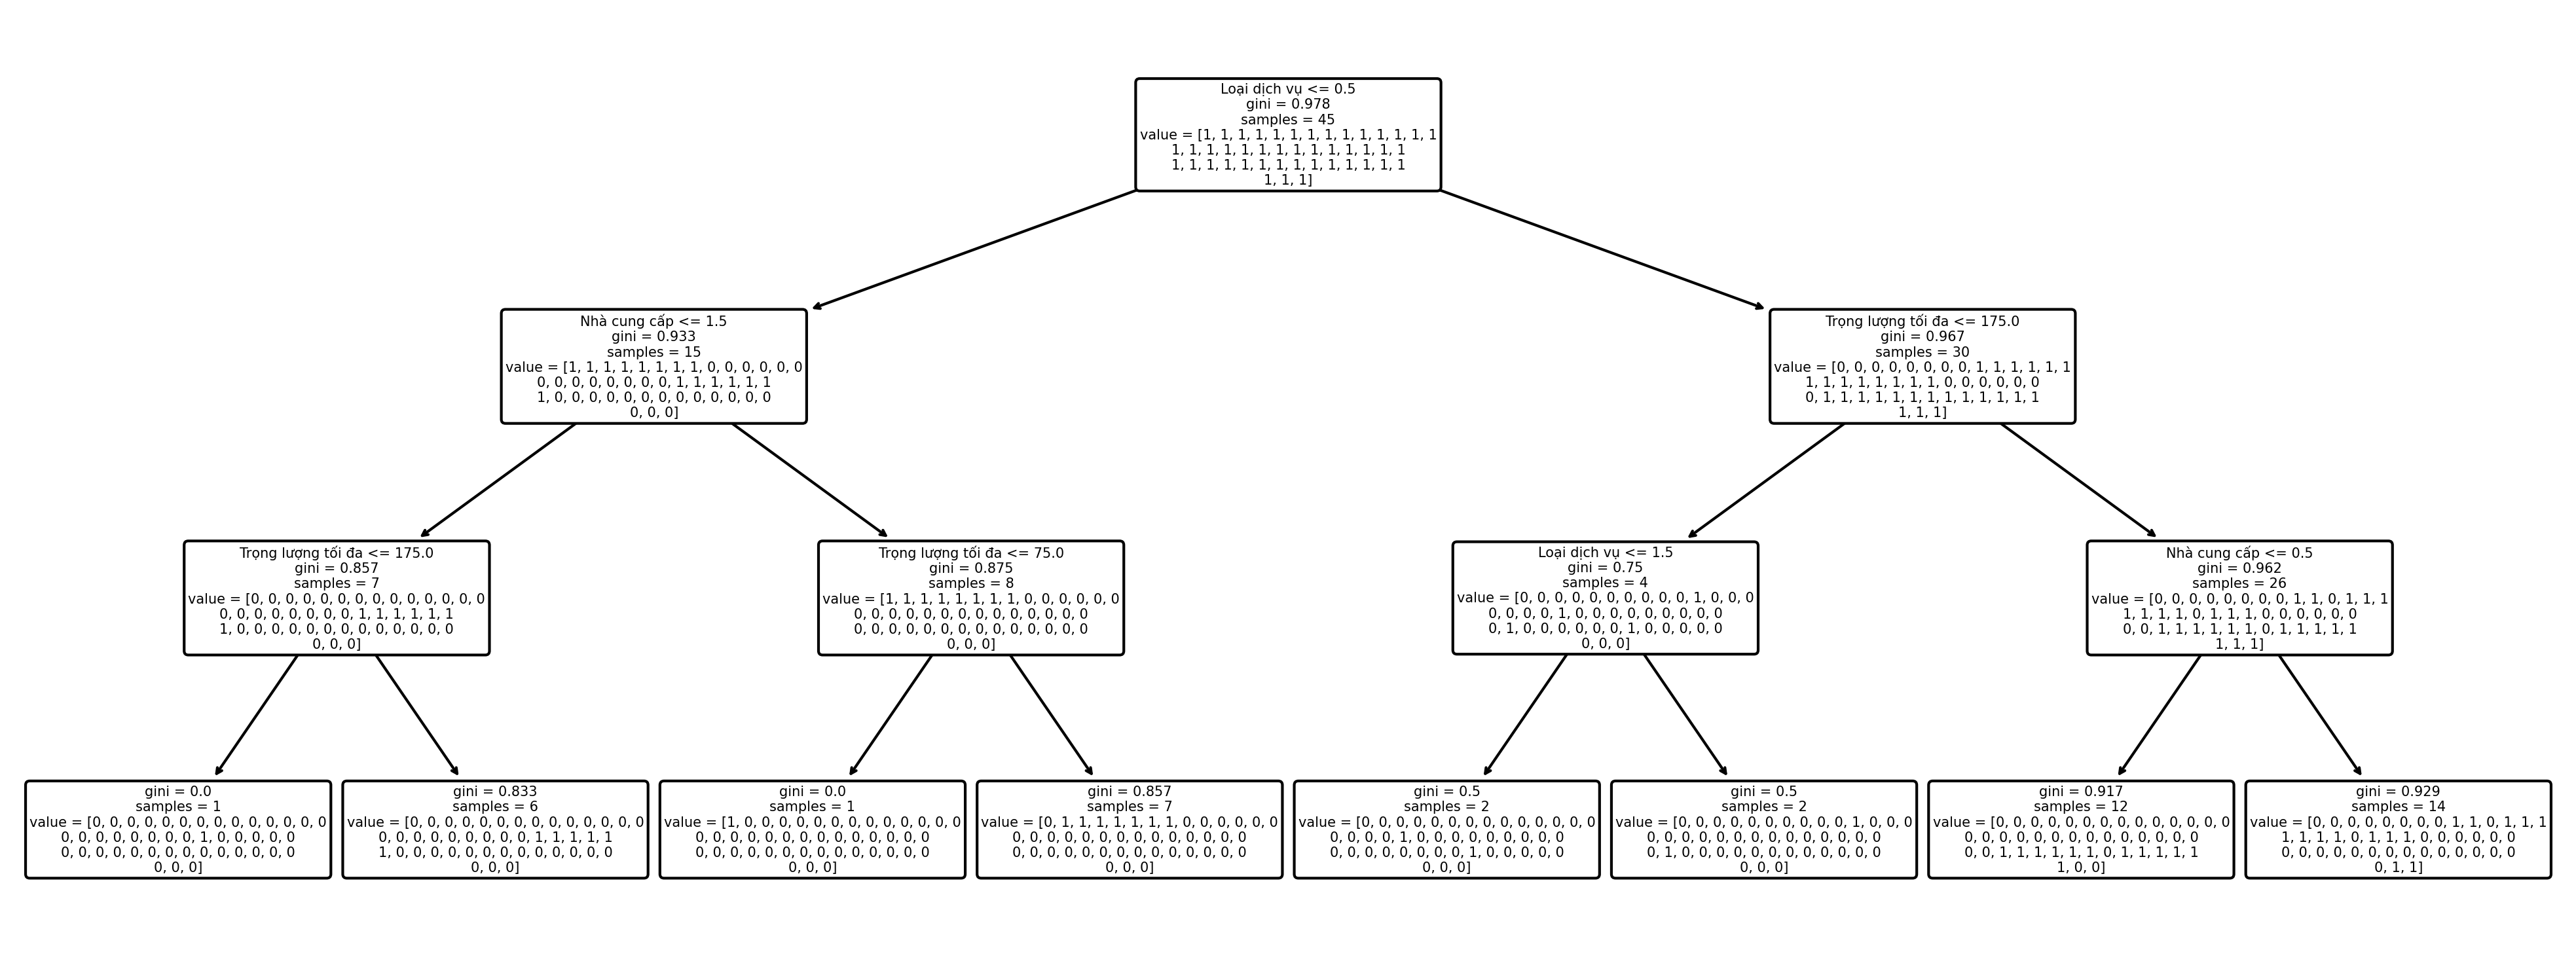

In [1375]:
import matplotlib.pyplot as plt
plt.figure(dpi=300, figsize=[13, 4.8], layout='constrained')
tree.plot_tree(model3, fontsize=5, rounded=True, feature_names=inputs_n.columns)
plt.show()

In [1376]:
model3.score(inputs_n.values,target)

0.17777777777777778

In [1377]:
rules = export_text(model3, feature_names=inputs_n.columns)

In [1378]:
print(rules)

|--- Loại dịch vụ <= 0.50
|   |--- Nhà cung cấp <= 1.50
|   |   |--- Trọng lượng tối đa <= 175.00
|   |   |   |--- class: 264
|   |   |--- Trọng lượng tối đa >  175.00
|   |   |   |--- class: 265
|   |--- Nhà cung cấp >  1.50
|   |   |--- Trọng lượng tối đa <= 75.00
|   |   |   |--- class: 9
|   |   |--- Trọng lượng tối đa >  75.00
|   |   |   |--- class: 10
|--- Loại dịch vụ >  0.50
|   |--- Trọng lượng tối đa <= 175.00
|   |   |--- Loại dịch vụ <= 1.50
|   |   |   |--- class: 172
|   |   |--- Loại dịch vụ >  1.50
|   |   |   |--- class: 134
|   |--- Trọng lượng tối đa >  175.00
|   |   |--- Nhà cung cấp <= 0.50
|   |   |   |--- class: 370
|   |   |--- Nhà cung cấp >  0.50
|   |   |   |--- class: 131



In [1379]:
result = model.predict([[0,0,2000]])
result2 = model2.predict([[0,0,2000]])
result3 = model3.predict([[0,0,2000]])
result4 = model4.predict([[0,0,2000]])
result5 = model5.predict([[0,0,2000]])
result6 = model6.predict([[0,0,2000]])
result7 = model7.predict([[0,0,2000]])
result8 = model8.predict([[0,0,2000]])
result9 = model9.predict([[0,0,2000]])
result10 = model10.predict([[0,0,2000]])

In [1380]:
model2.predict_proba([[0,1,2500]])

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.07142857,
        0.07142857, 0.07142857, 0.07142857, 0.07142857, 0.07142857,
        0.07142857, 0.07142857, 0.07142857, 0.07142857, 0.07142857,
        0.07142857, 0.07142857, 0.07142857, 0.        , 0.        ]])

In [1381]:
data = set()
data.add(result[0])
data.add(result2[0])
data.add(result3[0])
data.add(result4[0])
data.add(result5[0])
data.add(result6[0])
data.add(result7[0])
data.add(result8[0])
data.add(result9[0])
data.add(result10[0])

In [1382]:
data

{9, 264, 265, 266, 267, 268, 269}